In [27]:
import os

train_Path = 'C:/Users/wjdtn/Documents/GitHub/AI_sw/DogAndCat/training_set'
test_Path = 'C:/Users/wjdtn/Documents/GitHub/AI_sw/DogAndCat/test_set'

In [28]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

imageGenerator = ImageDataGenerator(rescale = 1./255, rotation_range = 20, width_shift_range = 0.1, height_shift_range = 0.1, brightness_range = [.2,.2], horizontal_flip = True, validation_split = .2)


In [29]:
trainGen = imageGenerator.flow_from_directory(os.path.join("C:", os.sep, "Users", "wjdtn", "Documents", "GitHub", "AI_sw", "DogAndCat", "training_set", "training_set"), target_size = (64, 64), subset = "training")
validationGen = imageGenerator.flow_from_directory(os.path.join("C:", os.sep, "Users", "wjdtn", "Documents", "GitHub", "AI_sw", "DogAndCat", "test_set", "test_set"), target_size = (64, 64), subset = "validation")
#경로 설정 오류가 계속 나네요 ㅠㅠ 이렇게해서 하긴 했습니다

Found 6404 images belonging to 2 classes.
Found 404 images belonging to 2 classes.


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.InputLayer(input_shape = (64, 64, 3)))
model.add(layers.Conv2D(16, (3,3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate = 0.1))

model.add(layers.Conv2D(32, (3,3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate = 0.1))

model.add(layers.Conv2D(64, (3,3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate = 0.1))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(2, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [31]:
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

opt = optimizers.Adam(lr = 0.001)

model.compile(
    optimizer = opt,
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

C:\Users\wjdtn\Anaconda3\envs\keras_env\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [12]:
epochs = 1000

es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5)

history = model.fit_generator(
    trainGen,
    epochs = epochs,
    validation_data = validationGen,
    callbacks = [es]
)

C:\Users\wjdtn\Anaconda3\envs\keras_env\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/1000
201/201 [==============================] - 48s 237ms/step - loss: 0.6932 - acc: 0.5069 - val_loss: 0.6900 - val_acc: 0.5644
Epoch 2/1000
201/201 [==============================] - 23s 117ms/step - loss: 0.6720 - acc: 0.5882 - val_loss: 0.6291 - val_acc: 0.6411
Epoch 3/1000
201/201 [==============================] - 23s 116ms/step - loss: 0.6238 - acc: 0.6530 - val_loss: 0.5874 - val_acc: 0.7104
Epoch 4/1000
201/201 [==============================] - 24s 117ms/step - loss: 0.6030 - acc: 0.6754 - val_loss: 0.5885 - val_acc: 0.6906
Epoch 5/1000
201/201 [==============================] - 23s 116ms/step - loss: 0.5936 - acc: 0.6818 - val_loss: 0.5711 - val_acc: 0.7228
Epoch 6/1000
201/201 [==============================] - 24s 117ms/step - loss: 0.5747 - acc: 0.7039 - val_loss: 0.5968 - val_acc: 0.7054
Epoch 7/1000
201/201 [==============================] - 23s 116ms/step - loss: 0.5709 - acc: 0.6993 - val_loss: 0.5270 - val_acc: 0.7426
Epoch 8/1000
201/201 [===================

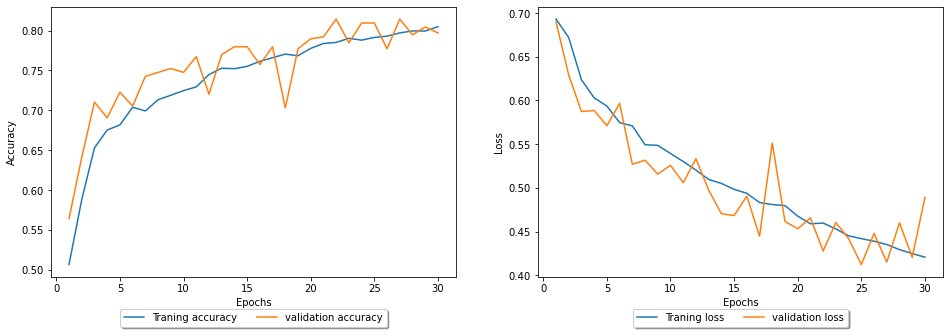

In [32]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize = (16, 2))
    
    plt.subplot(121)
    plt.subplots_adjust(top = 2)
    plt.plot(epochs, accuracy, label = 'Traning accuracy')
    plt.plot(epochs, val_accuracy, label = 'validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.1),
              fancybox = True, shadow = True, ncol = 5)
    
    plt.subplot(122)
    plt.plot(epochs, loss, label = 'Traning loss')
    plt.plot(epochs, val_loss, label = 'validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.1),
              fancybox = True, shadow = True, ncol = 5)
    
    fig = plt.gcf()
    plt.show()
    
show_graph(history.history)

In [33]:
testGenerator = ImageDataGenerator(
    rescale = 1./255)

testGen = imageGenerator.flow_from_directory(
    os.path.join("C:", os.sep, "Users", "wjdtn", "Documents", "GitHub", "AI_sw", "DogAndCat", "test_set", "test_set"),
    target_size = (64, 64))

Found 2023 images belonging to 2 classes.


In [34]:
model.evaluate_generator(testGen)

[0.693003237247467, 0.5027187466621399]

예측: 개
정답: 고양이


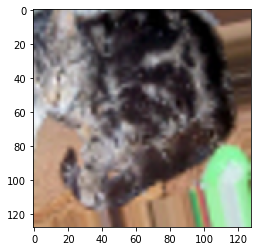

In [62]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = np.argmax(model.predict(arr.reshape(1, 64, 64, 3)), axis=-1)
#result = model.predict_classes(arr.reshape(1, 64, 64, 3))   2.5버전에서는 없어졌다
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))
